<a href="https://colab.research.google.com/github/daxtonhunter2634-glitch/IS4460/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and pre-review the data
2. Examine or profile the data: assess the shape, data types, distributions, missing values or inconsistencies
3. Exploratory data analytics (EDA): create visualizations to better understand the variables and relationships in the data

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Matplotlib
- Seaborn


In [ ]:
#Import libraries 🔧



In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Import the data and preview it

We are going to import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to the folder called DataSets - click on *'Raw'* button to get the url of raw dataset)

As in the AdviseInvest case, we will assume `answered` is our target variable. Let us a

In [62]:
#Import the data 🔧
answered='https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/refs/heads/main/DataSets/adviseinvest_historical_data.csv'
df = pd.read_csv(answered)

## Task 2: Initial Data Understanding: examine or profile the data

 - Profile the dataframe - obtain the shape of the table, data types, counts of variables, missing values
 - Are there any duplicate rows?
 - Describe the dataframe - Look for any outliers



In [63]:
#View the shape of the data
df.shape

(29504, 14)

In [66]:
#View the datatypes, counts and missing values 🔧
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


In [67]:
df.isnull().sum()

,0
answered,0
income,0
female,0
age,0
job,0
num_dependents,0
rent,0
own_res,0
new_car,2
chk_acct,0


In [68]:
#Check for duplicated rows
has_duplicates = df.duplicated().any()
print(f"Dataset has duplicates: {has_duplicates}")

Dataset has duplicates: True


In [88]:
#Describe the data's numerical columns - are there outliers? look at min, max values compared to mean🔧
df.describe()

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,28539.000000,28539.000000,28539.000000,28539.000000,28539.000000,28539.000000,28539.000000,28537.000000,28539.000000,28539.000000,28539.000000,28539.000000,28539.000000
mean,0.547076,33131.479029,34.445180,1.914853,1.141245,0.208557,0.686044,0.239899,1.472967,0.966257,2.352010,0.091944,1.531378
std,0.497788,27368.776565,10.765326,0.650587,0.348281,0.406284,0.464107,0.427029,1.239489,1.490297,1.186447,0.288952,1.619064
min,0.000000,5710.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13720.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23330.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,40570.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,143180.000000,68.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


There are not many outliers in the data except in the income column where the minimum income is a negative number(-65600), which makes no sense because you cannot make negative income. Therefore; skewing the income average.

As well as, the number of accounts(num_accts) has a massive outlier with someone having over 3000 accounts

And lastly the max age is at 132 and that is not correct because no one has lived that long.



In [72]:
#Remove any extreme outliers that you find - check for clues in the output of describe
i_low = df['income'].quantile(0.01)
i_high = df['income'].quantile(1)
df = df[(df['income'] >= i_low) & (df['income'] <= i_high)]

In [74]:
numac_low = df['num_accts'].quantile(0)
numac_high = df['num_accts'].quantile(0.99)
df = df[(df['num_accts'] >= numac_low) & (df['num_accts'] <= numac_high)]

In [76]:
age_low = df['age'].quantile(0)
age_high = df['age'].quantile(0.99)
df = df[(df['age'] >= age_low) & (df['age'] <= age_high)]

## Task 3: Explore the data - create visualizations
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

Text(0.5, 1.0, 'Income vs Age')

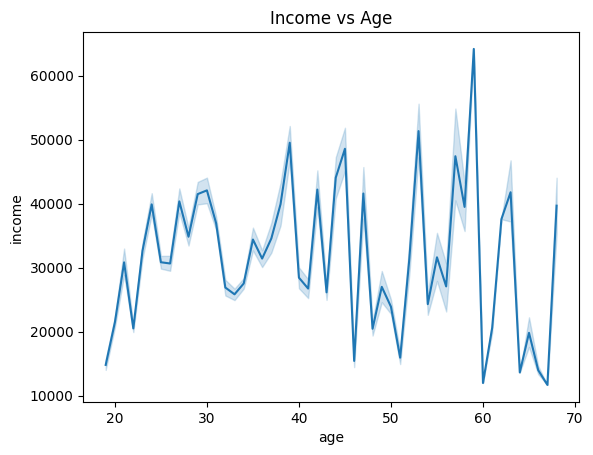

In [78]:
# Chart 1
sns.lineplot(y=df['income'],x=df['age'])
plt.title('Income vs Age')

Text(0.5, 1.0, 'Income vs Number of Accounts')

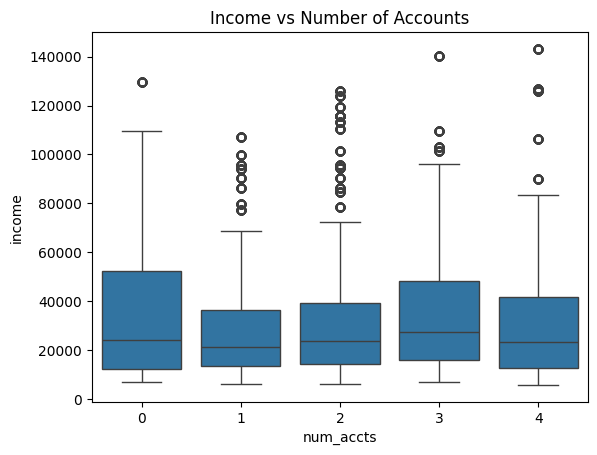

In [79]:
# Chart 2
sns.boxplot(y=df['income'],x=df['num_accts'])
plt.title('Income vs Number of Accounts')

Text(0.5, 1.0, 'Income vs Amount of Jobs')

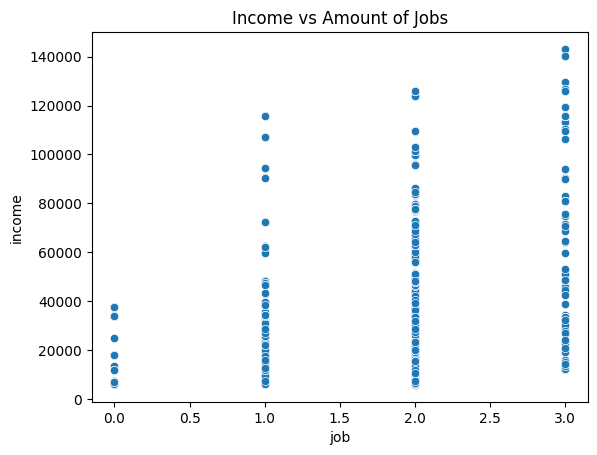

In [81]:
# Chart 3 🔧
sns.scatterplot(y=df['income'],x=df['job'])
plt.title('Income vs Amount of Jobs')

Text(0.5, 1.0, 'Age vs If they own their Residence')

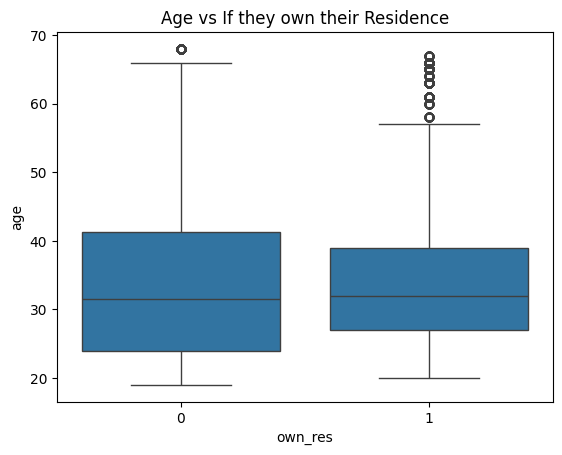

In [91]:
# Chart 4 🔧
sns.boxplot(y=df['age'],x=df['own_res'])
plt.title('Age vs If they own their Residence')

Text(0.5, 1.0, 'Age vs If they rent')

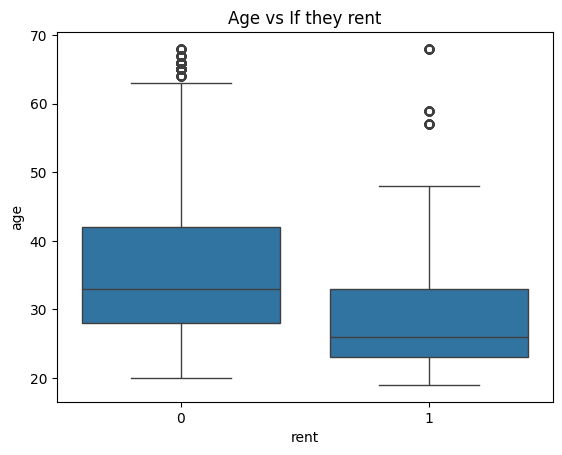

In [92]:
# Chart 5 🔧
sns.boxplot(y=df['age'],x=df['rent'])
plt.title('Age vs If they rent')

## Task 4: Summarize Your Findings
### 4.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

Write your response below:  🔧

All of the variables are applicable to the business needs, but some of the variables are going to be utilized a lot more for business processes. For example; income, age, rent, own residence, and number of jobs are a few that are useful to the business process to optimize revenue.

But the other variables that include mobile phone and whether they answered the call are not extremely useful but provide insight.

### 4.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

Write your response below: 🔧



With the savings and checkings account variables, the dataset could change the type of data from binary variables to categorical making them more useful for data analytical purposes. Providing an easier way to read and identify correlation between the data.

The data had some extreme outliers that heavily impacted some of the averages.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [ ]:
!jupyter nbconvert --to html "assignment_04_LastnameFirstname.ipynb"